> Imports

In [250]:
# Imports necessários para análise, visualização, clusterização e modelos preditivos
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Bibliotecas para clusterização e métricas
import sklearn.cluster as cluster
from sklearn.cluster import KMeans, DBSCAN

# Bibliotecas para modelos preditivos e avaliação
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.decomposition import PCA


In [251]:
# 1. Leitura dos dados
df = pd.read_csv('crop_yield.csv')
df.head()

,Crop,Precipitation (mm day-1),Specific Humidity at 2 Meters (g/kg),Relative Humidity at 2 Meters (%),Temperature at 2 Meters (C),Yield
0,"Cocoa, beans",2248.92,17.72,83.40,26.01,11560
1,"Cocoa, beans",1938.42,17.54,82.11,26.11,11253
2,"Cocoa, beans",2301.54,17.81,82.79,26.24,9456
3,"Cocoa, beans",2592.35,17.61,85.07,25.56,9321
4,"Cocoa, beans",2344.72,17.61,84.12,25.76,8800


In [252]:
# 2. Análise exploratória inicial
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 6 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Crop                                  156 non-null    object 
 1   Precipitation (mm day-1)              156 non-null    float64
 2   Specific Humidity at 2 Meters (g/kg)  156 non-null    float64
 3   Relative Humidity at 2 Meters (%)     156 non-null    float64
 4   Temperature at 2 Meters (C)           156 non-null    float64
 5   Yield                                 156 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 7.4+ KB


> Tratamento da Base de Dados

In [253]:
# 3. Remoção de duplicatas, se houver
df.drop_duplicates(inplace=True)

In [254]:
# 4. Transformação da coluna categórica 'Crop' em variáveis dummies para análise numérica
df = pd.get_dummies(df, columns=['Crop'], prefix=['Crop'])

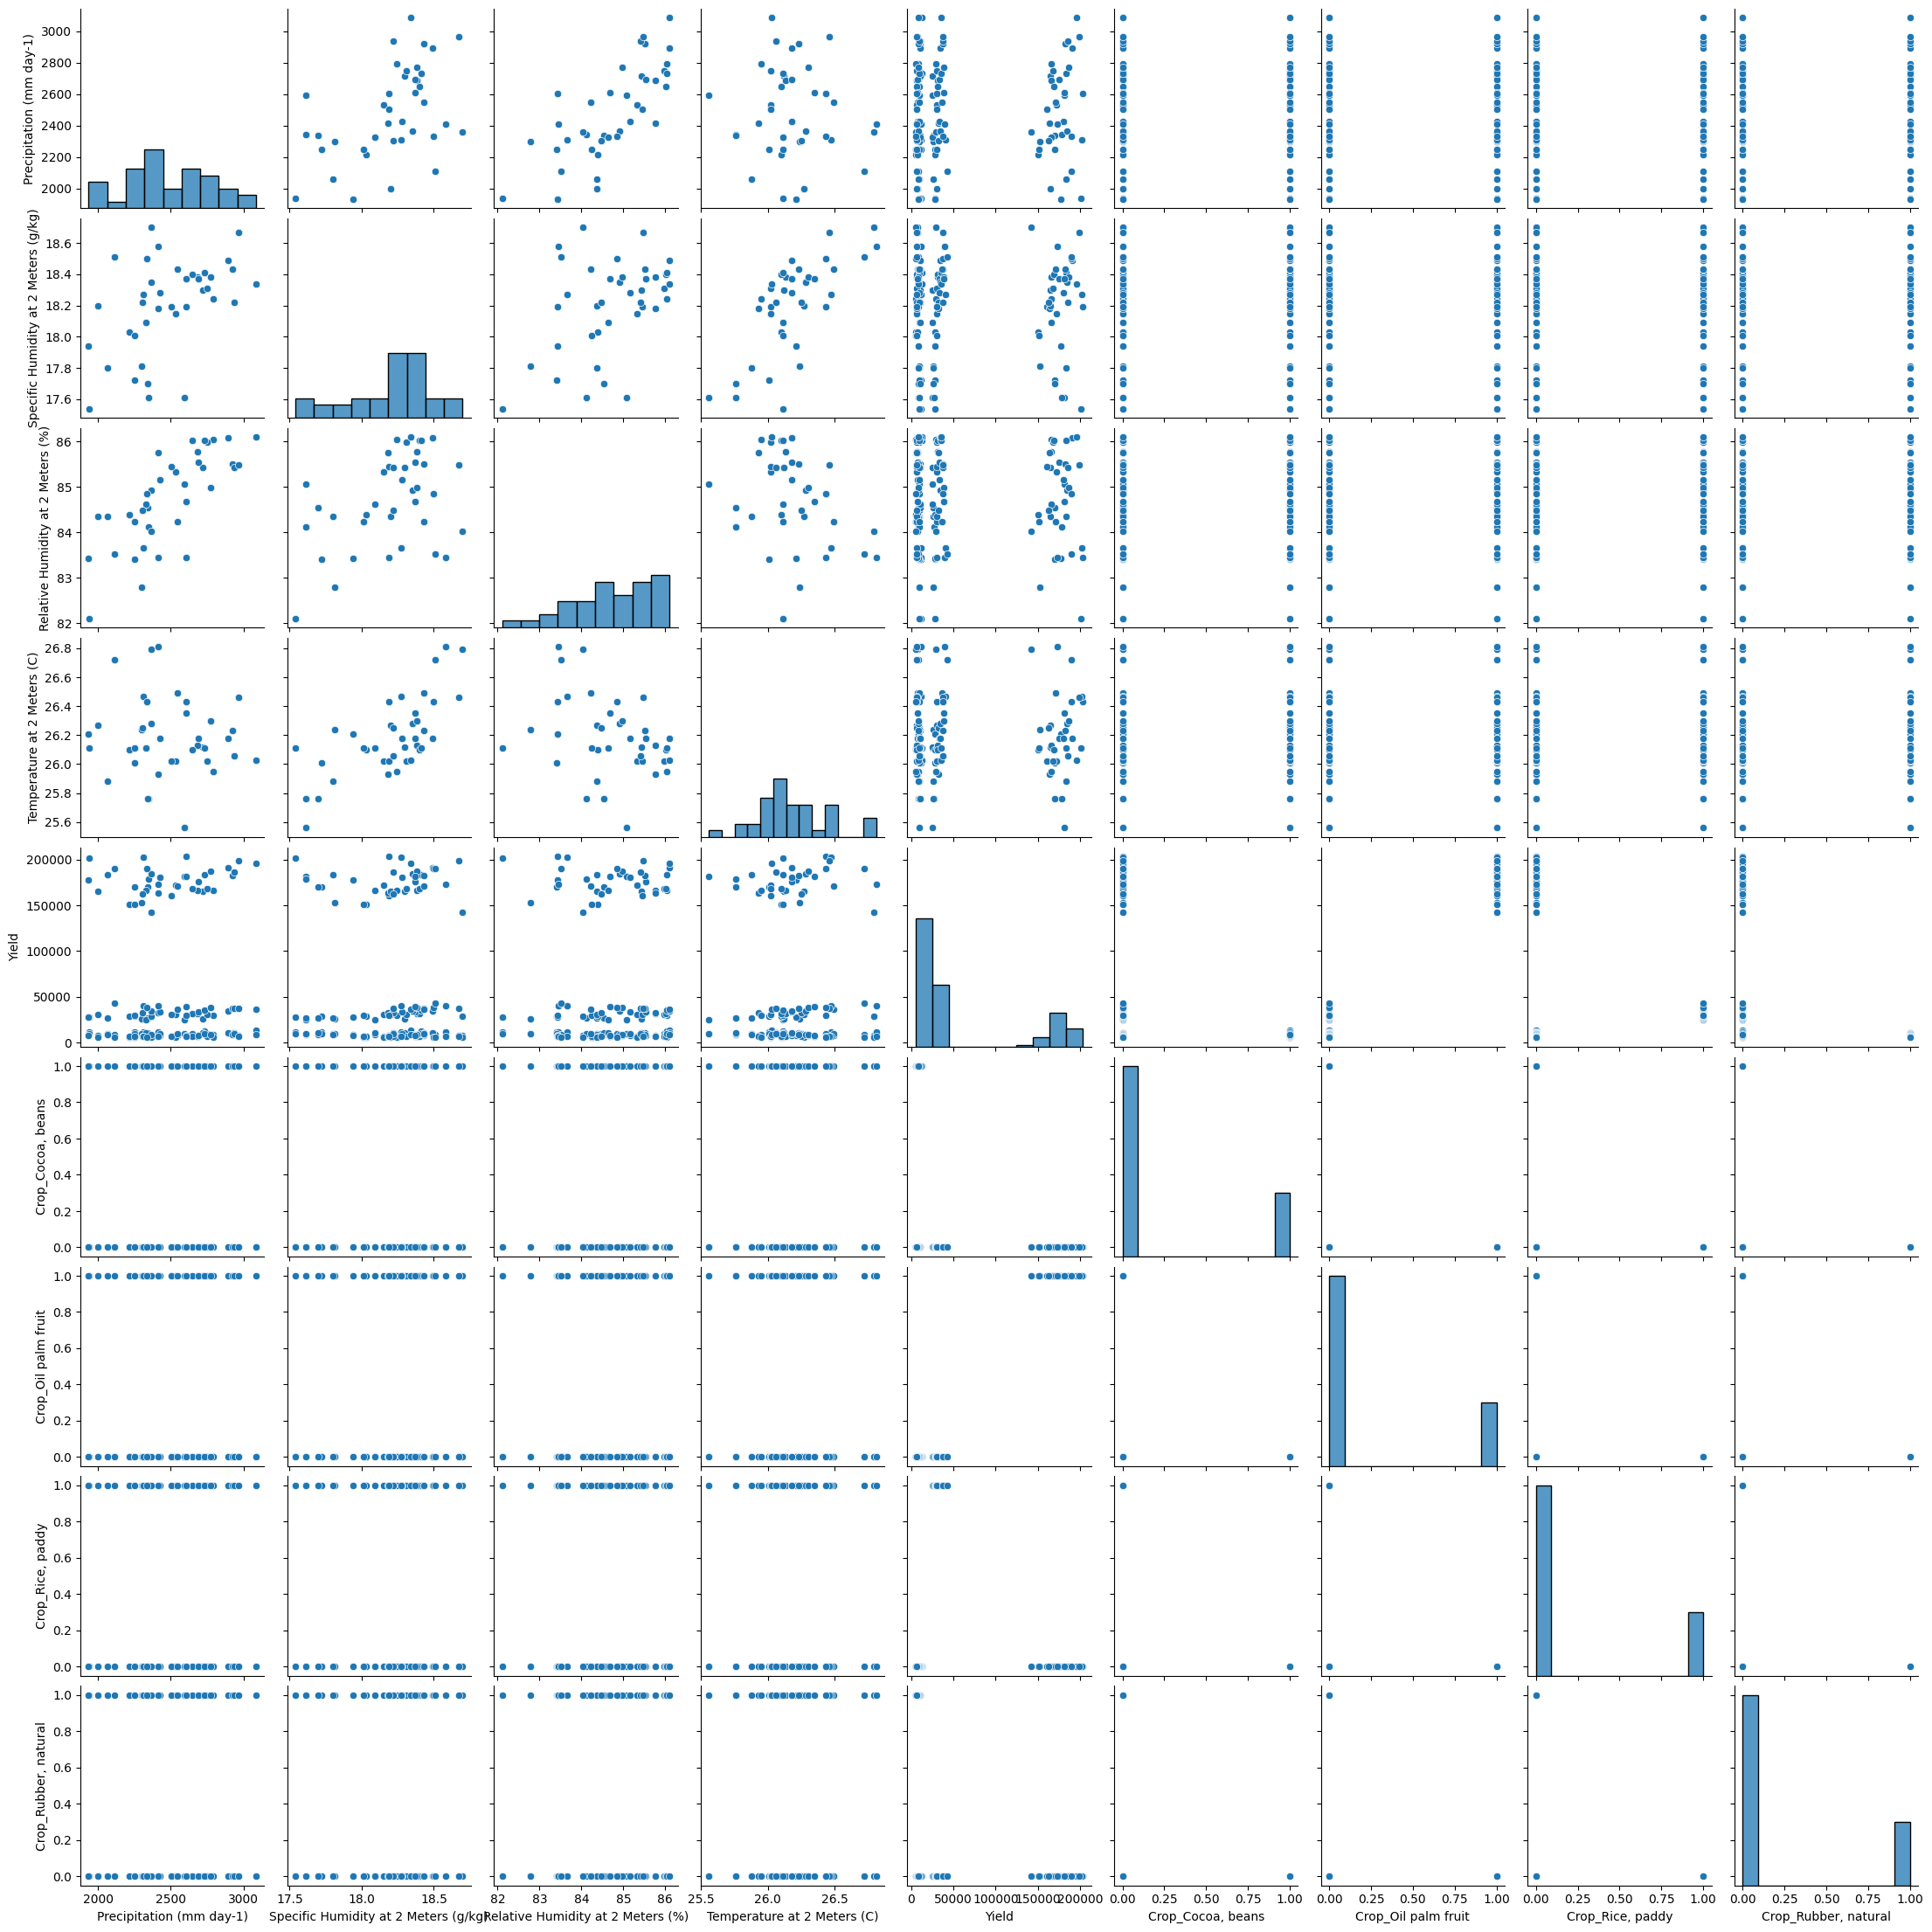

In [255]:
# 5. Visualização exploratória das relações entre as variáveis
sns.pairplot(df)
plt.show()

> Identificação de Outliers

In [256]:
# 6. Detecção de outliers usando LocalOutlierFactor
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor()
outliers = lof.fit_predict(df)
pd.DataFrame(outliers).value_counts()

0 
 1    148
-1      8
Name: count, dtype: int64

In [257]:
# 7. Remoção dos outliers identificados
df["outliers"] = outliers
df = df[df["outliers"] > 0]
df.shape

(148, 10)

> Clusterização

Valor do Yield médio: 176683.1052631579


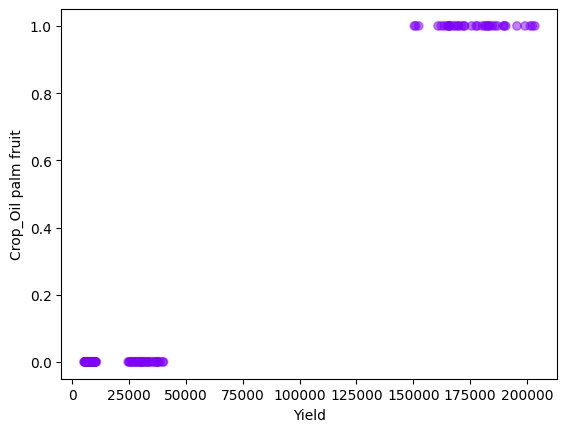

In [258]:
# 8. Clusterização DBSCAN para Oil palm fruit
dbscan = DBSCAN(eps=10, min_samples=8)
dbscan.fit(df[["Crop_Oil palm fruit","Yield"]])
dbscan_labels = dbscan.labels_
dbscan_labels

plt.scatter(df["Yield"], df["Crop_Oil palm fruit"], c=dbscan_labels, alpha=0.5, cmap='rainbow')
plt.xlabel("Yield")
plt.ylabel("Crop_Oil palm fruit")

# Cálculo do rendimento médio para Oil palm fruit
mean_oil_palm = df.loc[df['Crop_Oil palm fruit'] == 1, 'Yield'].mean()
print(f"Valor do Yield médio: {mean_oil_palm}")

Valor do Yield médio: 31824.657894736843


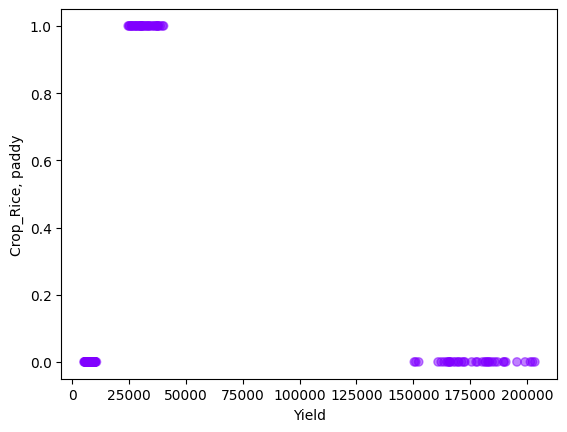

In [259]:
# 9. Clusterização DBSCAN para Rice, paddy
dbscan = DBSCAN(eps=10, min_samples=8)
dbscan.fit(df[["Crop_Rice, paddy","Yield"]])
dbscan_labels = dbscan.labels_
dbscan_labels

plt.scatter(df["Yield"], df["Crop_Rice, paddy"], c=dbscan_labels, alpha=0.5, cmap='rainbow')
plt.xlabel("Yield")
plt.ylabel("Crop_Rice, paddy")

# Cálculo do rendimento médio para Rice, paddy
mean_rice = df.loc[df['Crop_Rice, paddy'] == 1, 'Yield'].mean()
print(f"Valor do Yield médio: {mean_rice}")

Valor do Yield médio: 7824.897435897436


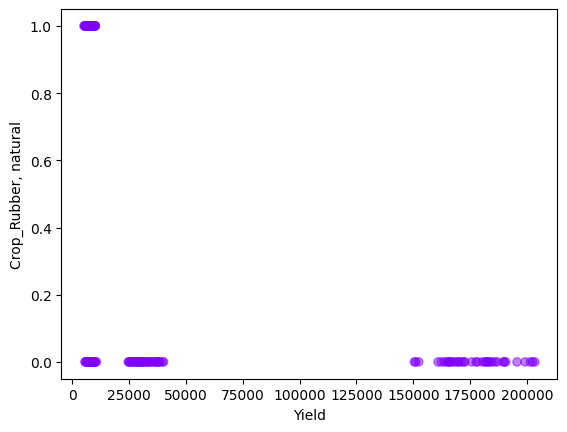

In [260]:
# 10. Clusterização DBSCAN para Rubber, natural
dbscan = DBSCAN(eps=10, min_samples=8)
dbscan.fit(df[["Crop_Rubber, natural","Yield"]])
dbscan_labels = dbscan.labels_
dbscan_labels

plt.scatter(df["Yield"], df["Crop_Rubber, natural"], c=dbscan_labels, alpha=0.5, cmap='rainbow')
plt.xlabel("Yield")
plt.ylabel("Crop_Rubber, natural")

# Cálculo do rendimento médio para Rubber, natural
mean_rubber = df.loc[df['Crop_Rubber, natural'] == 1, 'Yield'].mean()
print(f"Valor do Yield médio: {mean_rubber}")

Valor do Yield médio: 8352.0


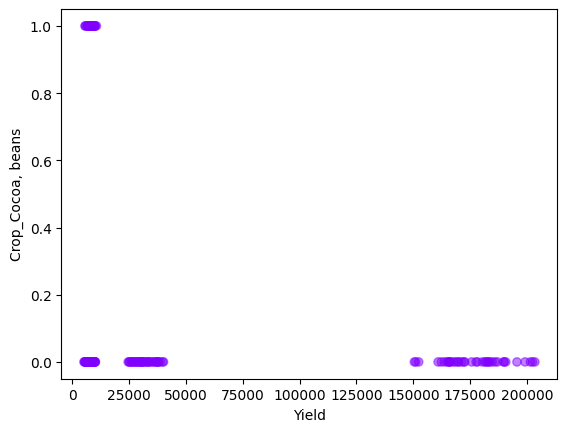

In [261]:
# 11. Clusterização DBSCAN para Cocoa, beans
dbscan = DBSCAN(eps=10, min_samples=8)
dbscan.fit(df[["Crop_Cocoa, beans","Yield"]])
dbscan_labels = dbscan.labels_
dbscan_labels

plt.scatter(df["Yield"], df["Crop_Cocoa, beans"], c=dbscan_labels, alpha=0.5, cmap='rainbow')
plt.xlabel("Yield")
plt.ylabel("Crop_Cocoa, beans")

# Cálculo do rendimento médio para Cocoa, beans
mean_cocoa = df.loc[df['Crop_Cocoa, beans'] == 1, 'Yield'].mean()
print(f"Valor do Yield médio: {mean_cocoa}")

>> Pipeline dos Modelos de Predição

In [262]:
# 12. Preparação dos dados para modelos preditivos
X = df.drop(columns=['Yield'])
y = df['Yield']

# Divisão dos dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar os dados para padronização
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [263]:
# Função para treinar o modelo, fazer previsões e calcular métricas
def train_n_calc_predt(model, X_train, X_test, y_train):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    calc_metrics(y_test, y_pred)

def calc_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"MSE: {mse}")
    print(f"MAE: {mae}")
    print(f"R²: {r2}")

In [264]:
# Função para aplicar PCA e retornar os dados transformados

def train_with_pca(model,X_train_scaled, X_test_scaled, n_components=2):
    """
    Aplica PCA nos dados de treino e teste e retorna os dados transformados.
    """
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)
    train_n_calc_predt(model,X_train_pca, X_test_pca, y_train)
    
    

> Regressão Linear

In [265]:
train_n_calc_predt(LinearRegression(), X_train, X_test, y_train)

MSE: 47374591.20030192
MAE: 4606.662215969789
R²: 0.9908366507602082


In [266]:
# Aplicação de PCA para redução de dimensionalidade

train_with_pca(LinearRegression(),X_train_scaled, X_test_scaled, n_components=2)

MSE: 5227587470.353222
MAE: 59649.79181445868
R²: -0.011137161476990398


> Random Forest Regressor

In [267]:
train_n_calc_predt(RandomForestRegressor(), X_train, X_test, y_train)

MSE: 37814665.265319996
MAE: 3516.8759999999993
R²: 0.9926857630760993


In [268]:
# Aplicação de PCA para redução de dimensionalidade

train_with_pca(RandomForestRegressor(),X_train_scaled, X_test_scaled, n_components=2)

MSE: 6899101828.615729
MAE: 66237.05166666667
R²: -0.334446966079339


> SVR

In [269]:
train_n_calc_predt(SVR(), X_train, X_test, y_train)

MSE: 5910481606.456334
MAE: 47753.95955831696
R²: -0.1432247912458955


In [270]:
# Aplicação de PCA para redução de dimensionalidade

train_with_pca(SVR(),X_train_scaled, X_test_scaled, n_components=2)

MSE: 5910432651.898456
MAE: 47755.08543243625
R²: -0.14321532229430445


> Decision Tree Regressor

In [172]:
train_n_calc_predt(DecisionTreeRegressor(), X_train, X_test, y_train)

MSE: 41052931.6
MAE: 3561.9333333333334
R²: 0.992059406951343


In [271]:
# Aplicação de PCA para redução de dimensionalidade

train_with_pca(DecisionTreeRegressor(),X_train_scaled, X_test_scaled, n_components=2)

MSE: 10848949205.5
MAE: 69872.76666666666
R²: -1.0984394363306764


> KNeightbors Regressor

In [273]:
train_n_calc_predt(KNeighborsRegressor(), X_train, X_test, y_train)

MSE: 5600181802.388
MAE: 63407.993333333325
R²: -0.08320558260100941


In [274]:
# Aplicação de PCA para redução de dimensionalidade

train_with_pca(KNeighborsRegressor(),X_train_scaled, X_test_scaled, n_components=2)

MSE: 6339625388.266666
MAE: 61410.74666666667
R²: -0.22623119293043392


In [174]:
pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('regressor', RandomForestRegressor())
])

param_grid = {
    'regressor': [
        LinearRegression(),
        RandomForestRegressor(),
        SVR(),
        DecisionTreeRegressor(),
        KNeighborsRegressor()
    ]
}

In [175]:
grid = GridSearchCV(pipeline, param_grid, cv=5)
grid.fit(X_train, y_train)
print("Melhores parâmetros:", grid.best_params_)

Melhores parâmetros: {'regressor': RandomForestRegressor()}
